# Analysis of Brazilian Higher Education Data
### (Part 3 - Data Analysis, Section 1)

<b>Date:</b> 01/09/2020

<b>Author:</b> Cardoso, Thiago (thiago.guimaraesdf10@gmail.com)

<b>Project Description:</b> This study seeks to organize and develop a basic analysis of higher education data available for Brazilians public and private institutions. This is my first data science/exploration project using Python, therefore the analysis and codes showcased are far from being a repository of best practice. Any suggestions to improve this project are appreciated.

For better organization and comprehension, this study is divided into 3 parts:

- <b>Part 1 - Data Extraction</b>: Description of datasets used in the project, its sources and the path to download it. This notebook will be updated if future analysis demands new datasets.
- <b>Part 2 - Data Cleaning</b>: Code used to clean data and standardize column names. The main goal is to have comparable panel data, with annual information for courses, students, and institutions in the last decade.
- <b>Part 3 - Data Analysis</b>: The analysis is subdivided into 6 sections. The first section analysis the historical panorama of higher education growth in Brazil, especially in the last 10 years.

<b>This notebook is related to Section 1 of Part 3</b>

<b>Important issues:</b>

- English is not my mother language. Sorry for the mistakes;
- Many (maybe most) code lines lack consistency, performance and/or efficiency. Did my best to conciliate productivity and code quality. Any suggestions to improve code lines are welcome;
- The Analysis and Data Cleaning only scratch the surface of the extremely rich data used in this study.  Any author seeking to further this study fell free to contact me. I can also help with any translation issue and provide information for additional sources of data in Brazil.

## Library Import

In [238]:
import os
import time 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import folium
import json
import imageio
import fileinput

from selenium import webdriver
from branca.colormap import linear
from branca.colormap import LinearColormap
from pathlib import Path
from PIL import Image

In [239]:
# Defining directory

define_dir = "C:/Users/Thiago/Documents/DataScience/Projeto_A"

os.chdir(define_dir)

# Section 1 - Courses offer and student enrolemnt

This chapter analyses courses and students dataframes from the Higher Education Census.

The following figures are presented: 
    
- Figure 1.1 - Gif map with total courses per decade - by municipality
- Figure 1.2 - Line plot with new courses per year - by category
- Figure 1.3 - Undergrad courses offer per year - by courses fields
- Figure 1.4 - New freshman  x undergraduates per year - by category
- Figure 1.5 - Applications x freshman per year - by category
- Figure 1.6 - Racial distribution 2018 - by category
- Figure 1.7 - Gender distribution 2009 x 2017 - by course field

## Figure 1.1 - Gif map with total courses per decade - by municipality

According to the 2018 Higher Education Census, the Federal University of Bahia, a public institution in Salvador, offered the first still active higher undergrad course in Brazil, in the year of 1808. Since then, 22.737 new courses, public or private, were opened and are active. Nowadays, 953 municipalities offer at least one undergrad course. This represents less than 18% of Brazilian municipalities. The timelapse below showcase the slow and unequal expansion of undergrad courses in the last 21 decades. We see that the offer was highly concentrated in the Brazilian Southwest region and State capitals until 2010. Despite a geographical expansion in this decade, In 2018 large parts of Brazilian territory still don't have any private or public offer of higher education.

In [265]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)

In [266]:
# Keep only last year 

cursos = cursos[cursos['NU_ANO'] == 2018]

,Unnamed: 0,NU_ANO,CO_IES,CO_CURSO,CO_CATEGORIA_ADMINISTRATIVA,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_DETALHADA,CO_GRAU_ACADEMICO,CO_MODALIDADE_ENSINO,CO_MUNICIPIO_CURSO,QT_INSCRITOS_ANO,QT_VAGAS,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,DT_INICIO_FUNCIONAMENTO,NM_CATEGORIA_ADMINISTRATIVA,NO_AREA_GERAL,ANO_INICIO
322841,325863,2018,1,1,1,NaN,NaN,1.0,1,5103403.0,3141.0,92.0,445.0,76.0,99.0,05/09/1952,PUBLICA,NaN,1952.0
322842,325864,2018,1,2,1,NaN,NaN,1.0,1,5103403.0,919.0,120.0,344.0,38.0,120.0,11/10/1968,PUBLICA,NaN,1968.0
322843,325865,2018,1,3,1,NaN,NaN,1.0,1,5103403.0,637.0,55.0,266.0,34.0,53.0,11/10/1968,PUBLICA,NaN,1968.0
322844,325866,2018,1,6,1,NaN,NaN,2.0,1,5103403.0,1461.0,100.0,326.0,49.0,98.0,15/09/1970,PUBLICA,NaN,1970.0
322845,325867,2018,1,7,1,NaN,NaN,1.0,1,5103403.0,1449.0,83.0,253.0,23.0,81.0,09/03/1970,PUBLICA,NaN,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360797,364114,2018,23459,5001430,2,NaN,NaN,3.0,1,3500105.0,89.0,35.0,34.0,0.0,36.0,NaN,PUBLICA,NaN,NaN
360798,364115,2018,23700,1458085,2,NaN,NaN,3.0,1,3515707.0,155.0,40.0,38.0,0.0,41.0,01/08/2018,PUBLICA,NaN,2018.0
360799,364116,2018,23700,1458087,2,NaN,NaN,3.0,1,3515707.0,163.0,40.0,40.0,0.0,41.0,01/08/2018,PUBLICA,NaN,2018.0
360800,364117,2018,23705,1465936,2,NaN,NaN,3.0,1,3516408.0,41.0,41.0,33.0,0.0,41.0,NaN,PUBLICA,NaN,NaN


In [268]:
# Dataframe with total courses per year

totalCursos_porMunicipio_porAno = cursos[['CO_MUNICIPIO_CURSO','ANO_INICIO']]

totalCursos_porMunicipio_porAno = totalCursos_porMunicipio_porAno.dropna()

totalCursos_porMunicipio_porAno['CO_MUNICIPIO_CURSO'] = totalCursos_porMunicipio_porAno['CO_MUNICIPIO_CURSO'].astype(int)

totalCursos_porMunicipio_porAno['ANO_INICIO'] = totalCursos_porMunicipio_porAno['ANO_INICIO'].astype(int)

totalCursos_porMunicipio_porAno

,CO_MUNICIPIO_CURSO,ANO_INICIO
322841,5103403,1952
322842,5103403,1968
322843,5103403,1968
322844,5103403,1970
322845,5103403,1970
...,...,...
360792,2100055,2012
360793,2105302,2015
360794,2105302,2015
360798,3515707,2018


In [269]:
# Geojson file with brazilian municipality areas 

br_municipios = "data/json_files/geojs-100-mun.json"
geo_json_data = json.load(open(br_municipios, encoding='utf-8'))

In [270]:
# list with all brazilian municipalities id

cd_municipios = []

for i in range(0,5564):
    cd_municipios.append(str(geo_json_data['features'][i]['properties'].get('id')))

cd_municipios_dict = dict.fromkeys(cd_municipios, 0)

In [271]:
# seting colormap scale

colormap = linear.YlOrRd_09.scale(0,10)
colormap

In [272]:
# Creating one choropleth map for each decade with log of total courses offered per municipality

for i in range(1808,2019,10):
    
    totalCursos_porMunicipio_porAno_i = totalCursos_porMunicipio_porAno[totalCursos_porMunicipio_porAno['ANO_INICIO'] <= i]

    totalCursos_porMunicipio_porAno_i = totalCursos_porMunicipio_porAno_i[['CO_MUNICIPIO_CURSO']]
    
    totalCursos_porMunicipio_porAno_i['COUNT'] = 1

    totalCursos_porMunicipio_porAno_i['COUNT'] = np.log(totalCursos_porMunicipio_porAno_i['COUNT']) + 1
    
    totalCursos_porMunicipio_porAno_i['CO_MUNICIPIO_CURSO'] = totalCursos_porMunicipio_porAno_i['CO_MUNICIPIO_CURSO'].astype(str)
    
    totalCursos_porMunicipio_porAno_i = totalCursos_porMunicipio_porAno_i.groupby('CO_MUNICIPIO_CURSO')['COUNT'].sum().to_dict()

    for j in cd_municipios:
        if j in totalCursos_porMunicipio_porAno_i.keys():
            continue
        else: 
            totalCursos_porMunicipio_porAno_i[str(j)] = 0
            
    title_html = '''
                 <h3 align="left" style="font-size:16px"><b>{}</b></h3>
                 '''.format(str(i))   
    
    m_i = folium.Map(width=500, height=500,
               location=[-15.77972, -54.92972], 
               zoom_start=4,
               tiles='cartodbpositron')
    
    m_i.get_root().html.add_child(folium.Element(title_html))
    
    folium.GeoJson(
        geo_json_data,
        style_function=lambda feature: {
            'fillColor': colormap(totalCursos_porMunicipio_porAno_i[feature['properties']['id']]),
            'color': 'darkred',
            'weight': 0.5,
            'lineColor': 'white',
            'stroke' : False
        } 
    ).add_to(m_i)


    m_i.save('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.html')
    

In [273]:
# Turn ZoomControl off in each html file

for i in range(1808,2019,10):
    with fileinput.FileInput('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.html', inplace=True) as file:
        for line in file:
            print(line.replace('zoomControl: true', 'zoomControl: false'), end='')

In [274]:
# Convert html files to png

delay=5

for i in range(1808,2019,10):
    fn='outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.html'
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)

    browser = webdriver.Chrome()
    browser.get(tmpurl)

    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.png')
    browser.quit()
    
    #remove html files
    os.remove('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.html')

In [275]:
# cropping images for better visualization

for i in range(1808,2019,10):
    image = Image.open('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.png')
    box = (0, 0, 800, 800)
    cropped_image = image.crop(box)
    cropped_image.save('outputs/totalCursos_porMunicipio_porAno/totalCursos_porMunicipio_' + str(i) + '.png')

In [276]:
# Create gif with total courses time lapse

image_path = Path('outputs/totalCursos_porMunicipio_porAno')

images = list(image_path.glob('*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))
    os.remove(file_name)
    
imageio.mimwrite('outputs/figure1_1.gif', image_list, fps=2)

## Figure 1.2 -  Line plot with new courses per year  -  by category

Until the mid-'90s, public and private course offer were quite similar. New courses opening were around a hundred/per year in a steady trend that goes back to the beginning of the century. After 1996 there is a sharp rise in private courses offer. While in 1991 private and public institutions opened around 30 new courses each, in 2002 private institutions opened 1k new courses, 5.5 times more than public colleges. In a lower degree when compared to private courses offers, a significant rise in public courses offers starts in 2006 and goes until 2014. The line plot below shows a strong correlation between election years when the Labor Party was in office (red lines) and public undergrad courses opening.

In [283]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)

In [284]:
# Keep only last year 

cursos = cursos[cursos['NU_ANO'] == 2018]

In [285]:
# Dataframe with new courses by year and category 
cursos_porAno = cursos[cursos['QT_MATRICULA_CURSO']>0]
cursos_porAno['COUNT'] = 1
cursos_porAno = cursos_porAno.groupby(['ANO_INICIO','NM_CATEGORIA_ADMINISTRATIVA'])['COUNT'].sum().to_frame()
cursos_porAno.reset_index(level=[0,1], inplace=True)
cursos_porAno['ANO_INICIO'] = cursos_porAno['ANO_INICIO'].astype(int)
cursos_porAno = cursos_porAno[cursos_porAno['ANO_INICIO']<2019]

<ipython-input-285-1be11a7a4587>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cursos_porAno['COUNT'] = 1


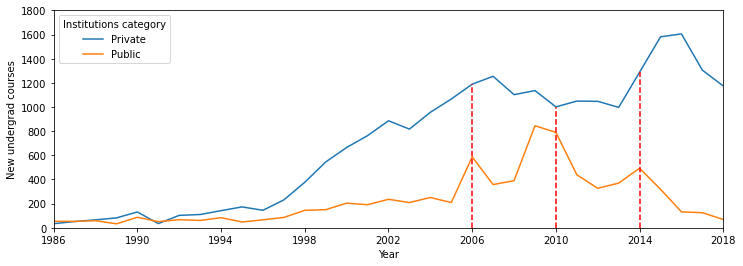

In [290]:
# Plot graph

fig1_2, (ax1) = plt.subplots(1,1, figsize = (12,4))

ax1.plot('ANO_INICIO','COUNT', label = 'Private',
        data=cursos_porAno[cursos_porAno['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA'])

ax1.plot('ANO_INICIO','COUNT', label = 'Public',
        data=cursos_porAno[cursos_porAno['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA'])

ax1.set(xlim=(1986,2018),
        ylim=(0,1800),
        xticks=range(1986,2019,4),
        xlabel='Year', 
        ylabel='New undergrad courses', 
        #title='Figure 1.2 - New courses per year of foundation - by category'
       )

for i in [2006,2010,2014]:
    plt.axvline(i, ymax=(cursos_porAno[(cursos_porAno['ANO_INICIO']==i) & (cursos_porAno['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA')]['COUNT'])/1800, 
                color='r', ls='--')

plt.legend(title='Institutions category', bbox_to_anchor=(.00, 1), loc='upper left')
plt.show()
fig1_2.savefig('outputs/figure1_2.png', dpi=400)

## Figure 1.3 - Undergrad courses offer per year - by courses areas 

In private institutions, the total number of new courses opened per year in the field of social sciences, business, and Lawsurpasses almost 2 times the second place, Education. In public educations, Education is the most popular field in the last decade. While course distribution in private institutions is very concentrated in 3 main fields, in public institutions there is a more egalitarian distribution.

In [291]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)

In [292]:
# Dataframe with total new students per year/area/category

cursos_porArea = cursos
cursos_porArea['COUNT'] = 1
cursos_porArea = cursos.groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA','NO_AREA_GERAL'])['QT_INGRESSO_CURSO'].sum().to_frame()
cursos_porArea.reset_index(level=[0,1,2], inplace=True)
cursos_porArea['NU_ANO'] = cursos_porArea['NU_ANO'].astype(int)
cursos_porArea = cursos_porArea[cursos_porArea['NU_ANO']<2018]

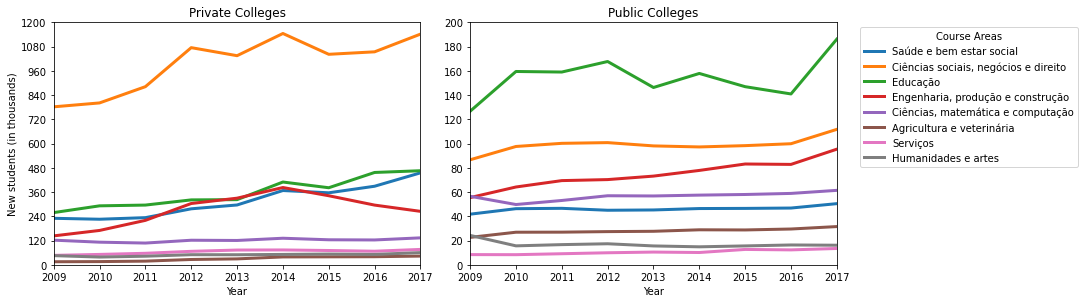

In [293]:
fig1_3, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

for i in list(nome_areas.keys()):
    ax1.plot('NU_ANO','QT_INGRESSO_CURSO',
             label='sdasd',
             data=cursos_porArea[(cursos_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA') & (cursos_porArea['NO_AREA_GERAL']==nome_areas.get(i))],
             linewidth=3
             )
    
for i in list(nome_areas.keys()):
    ax2.plot('NU_ANO','QT_INGRESSO_CURSO',
             label=nome_areas.get(i),
             data=cursos_porArea[(cursos_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA') & (cursos_porArea['NO_AREA_GERAL']==nome_areas.get(i))],
             linewidth=3
             )
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
ax2.yaxis.set_major_formatter(ticks_y)

ax1.set(xlabel='Year',
        ylabel='New students (in thousands)',
        title='Private Colleges',
        xlim=(2009,2017),
        ylim=(0,1200000),
        yticks=range(0,1200001,120000)
       )

ax2.set(xlabel='Year',
        title='Public Colleges',
        xlim=(2009,2017),
        ylim=(0,200000),
        yticks=range(0,200001,20000)
       )


fig1_3.tight_layout(rect=[0, 0.2, 1, 0.92])

plt.legend(title='Course Areas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
fig1_3.savefig('outputs/figure1_3.png', dpi=400, bbox_inches='tight')

## Figure 1.4 New students x undergraduates per year - by category

While new students rose from 1.6 to 2.9 million in Private Schools, the number of undergraduates rose from 420 to 540 thousand. In public schools, a 120 thousand rise in new students is followed by a 30 thousand increase in undergraduates from 2009 to 2018. Considering a 5-year medium course duration, we could expect that in 2013 1.6 million students that entered private college in 2009 should graduate. However, only about 800 thousand finished studies, indicating a conclusion rate in the expected time of only 50%. This conclusion rate falls to about 35% in the 2014 cohort. Public colleges present a higher and more constant conclusion rate, compared to private institutions. 55% in the 2009 and 2014 cohort.

In [294]:
# Dataframe with total new undergrad per year/category

ingressos_porArea = cursos
ingressos_porArea['COUNT'] = 1
ingressos_porArea = cursos.groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA'])['QT_INGRESSO_CURSO'].sum().to_frame()
ingressos_porArea.reset_index(level=[0,1], inplace=True)
ingressos_porArea['NU_ANO'] = ingressos_porArea['NU_ANO'].astype(int)
ingressos_porArea

concluintes_porArea = cursos
concluintes_porArea['COUNT'] = 1
concluintes_porArea = cursos.groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA'])['QT_CONCLUINTE_CURSO'].sum().to_frame()
concluintes_porArea.reset_index(level=[0,1], inplace=True)
concluintes_porArea['NU_ANO'] = concluintes_porArea['NU_ANO'].astype(int)
concluintes_porArea

,NU_ANO,NM_CATEGORIA_ADMINISTRATIVA,QT_CONCLUINTE_CURSO
0,2009,PRIVADA,752320.0
1,2009,PUBLICA,206877.0
2,2010,PRIVADA,783242.0
3,2010,PUBLICA,190597.0
4,2011,PRIVADA,798348.0
5,2011,PUBLICA,218365.0
6,2012,PRIVADA,833400.0
7,2012,PUBLICA,217013.0
8,2013,PRIVADA,783034.0
9,2013,PUBLICA,207976.0


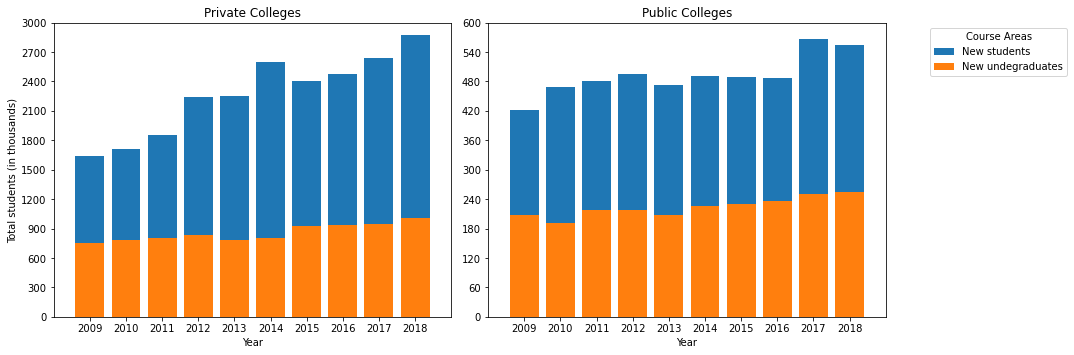

In [299]:
fig1_4, (ax1, ax2) = plt.subplots(1,2, figsize = (15,7))

ax1.bar('NU_ANO','QT_INGRESSO_CURSO', data=ingressos_porArea[ingressos_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA'])

ax1.bar('NU_ANO','QT_CONCLUINTE_CURSO',data=concluintes_porArea[concluintes_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA'])

ax2.bar('NU_ANO','QT_INGRESSO_CURSO', label = 'New students',
        data=ingressos_porArea[ingressos_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA'])

ax2.bar('NU_ANO','QT_CONCLUINTE_CURSO', label = 'New undegraduates',
        data=concluintes_porArea[concluintes_porArea['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA'])

scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y)
ax1.yaxis.set_major_formatter(ticks_y)

ax1.set(xlabel='Year',
        ylabel='Total students (in thousands)',
        title='Private Colleges',
        xlim=(2008,2019),
        ylim=(0,3000000),
        yticks=range(0,3000001,300000),
        xticks=range(2009,2019,1)
       )

ax2.set(xlabel='Year',
        title='Public Colleges',
        xlim=(2008,2019),
        ylim=(0,600000),
        yticks=range(0,600001,60000),
        xticks=range(2009,2019,1)
       )


plt.legend(title='Course Areas', bbox_to_anchor=(1.1, 1), loc='upper left')

fig1_4.tight_layout(rect=[0, 0.2, 1, 0.92])

plt.show()

fig1_4.savefig('outputs/figure1_4.png', dpi=400, bbox_inches='tight')

## Figure 1.5 - Applications x Freshman in Public Universities per year - by category

While in private institutions number of seats (freshman) has a strong correlation with the number of applications, in public institutions, there is a growing deficit in seats from 2009 to 2018. In 2009, there was a ratio of 9.5:1 between applications and freshman in public and 5.7:1 in privates. In 2018 ratios rise to 11.3:1 in public and a drop to 3.2:1 in private. 

In [300]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)

In [301]:
print(cursos[(cursos['NU_ANO']==2009) & (cursos['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA')][['QT_INGRESSO_CURSO','QT_INSCRITOS_ANO']].describe())
print(cursos[(cursos['NU_ANO']==2018) & (cursos['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA')][['QT_INGRESSO_CURSO','QT_INSCRITOS_ANO']].describe())
print(cursos[(cursos['NU_ANO']==2009) & (cursos['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA')][['QT_INGRESSO_CURSO','QT_INSCRITOS_ANO']].describe())
print(cursos[(cursos['NU_ANO']==2018) & (cursos['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA')][['QT_INGRESSO_CURSO','QT_INSCRITOS_ANO']].describe())


       QT_INGRESSO_CURSO  QT_INSCRITOS_ANO
count       12572.000000       8228.000000
mean           33.592109        314.669057
std            48.899111       1377.529672
min             0.000000          0.000000
25%             0.000000         21.000000
50%            24.000000        124.000000
75%            50.000000        339.250000
max          1830.000000     111260.000000
       QT_INGRESSO_CURSO  QT_INSCRITOS_ANO
count       10346.000000      10346.000000
mean           53.584574        601.392905
std           180.671443       1353.568045
min             0.000000          0.000000
25%            23.000000         54.000000
50%            42.000000        256.000000
75%            64.000000        657.000000
max         11693.000000      39204.000000
       QT_INGRESSO_CURSO  QT_INSCRITOS_ANO
count       50300.000000      19599.000000
mean           32.659284        185.434614
std            76.261960        792.756471
min             0.000000          0.000000
25%        

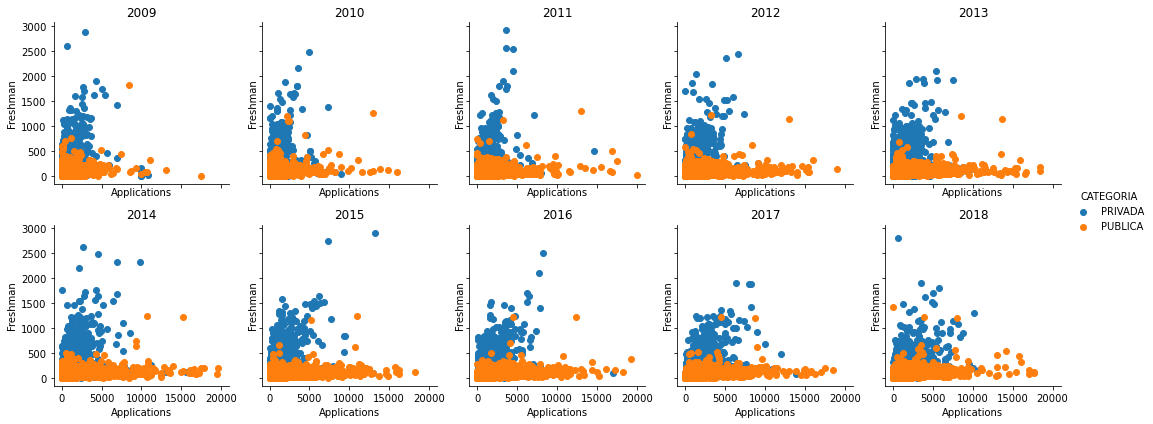

In [332]:
g = sns.FacetGrid(data=cursos[(cursos['QT_INGRESSO_CURSO']<3000)&(cursos['QT_INSCRITOS_ANO']<20000)&(cursos['CO_MODALIDADE_ENSINO']==1)], col='NU_ANO', 
                  col_wrap=5, 
                  hue='NM_CATEGORIA_ADMINISTRATIVA'
                 )
g = (g.map(plt.scatter, 'QT_INSCRITOS_ANO', 'QT_INGRESSO_CURSO').set(xlabel='Applications', 
                                                                     ylabel='Freshman',
                                                                     ))


for i in range(0,10,1):
    axes = g.axes.flatten()
    axes[i].set_title(str(2009+i))

g.fig.tight_layout()

    
g.add_legend(title='CATEGORIA')

g.fig.savefig('outputs/figure1_5.png', dpi=400, bbox_inches='tight')

## Figure 1.6 - Racial distribution 2018 - by institution category

In Brazil, about 50% of the population considers itself black or brown. In private and public institutions the proportion of non-white students in 2018 is around 48%. In private institutions, there is a lower rate of students who don't declare their race.

In [327]:
for i in [2009,2018]:
    globals()['alunos_'+str(i)] = pd.read_csv('data/alunos_'+str(i)+'.csv', usecols=['CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','CO_CURSO'])

In [328]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)
    
cursos_2009 = cursos[cursos['NU_ANO']==2009][['CO_CURSO','NM_CATEGORIA_ADMINISTRATIVA']]   
cursos_2018 = cursos[cursos['NU_ANO']==2018][['CO_CURSO','NM_CATEGORIA_ADMINISTRATIVA']]  

In [329]:
for i in [2009,2018]:

    globals()['alunos_'+str(i)]['COUNT'] = 1

    globals()['alunos_'+str(i)] = globals()['alunos_'+str(i)].groupby(['CO_COR_RACA_ALUNO','CO_CURSO'])['COUNT'].sum().to_frame()
    globals()['alunos_'+str(i)].reset_index(level=[0,1], inplace=True)

    globals()['alunos_'+str(i)] = pd.merge(globals()['alunos_'+str(i)], globals()['cursos_'+str(i)], on='CO_CURSO', how='inner')

In [330]:
for i in [2009,2018]:  
    totalalunos_Area = globals()['alunos_'+str(i)].groupby(['NM_CATEGORIA_ADMINISTRATIVA'])['COUNT'].sum().to_frame()

    globals()['alunos_'+str(i)+'_raca'] = globals()['alunos_'+str(i)].groupby(['CO_COR_RACA_ALUNO','NM_CATEGORIA_ADMINISTRATIVA'])['COUNT'].sum().to_frame()
    globals()['alunos_'+str(i)+'_raca'].reset_index(level=[0,1], inplace=True)

    globals()['alunos_'+str(i)+'_raca'] = pd.merge(globals()['alunos_'+str(i)+'_raca'],totalalunos_Area, on='NM_CATEGORIA_ADMINISTRATIVA', how='inner')
    globals()['alunos_'+str(i)+'_raca']['COUNT_x'] = globals()['alunos_'+str(i)+'_raca']['COUNT_x']*100/globals()['alunos_'+str(i)+'_raca']['COUNT_y']


    globals()['alunos_'+str(i)+'_raca'] = globals()['alunos_'+str(i)+'_raca'].pivot('NM_CATEGORIA_ADMINISTRATIVA','CO_COR_RACA_ALUNO','COUNT_x')

    globals()['alunos_'+str(i)+'_raca']

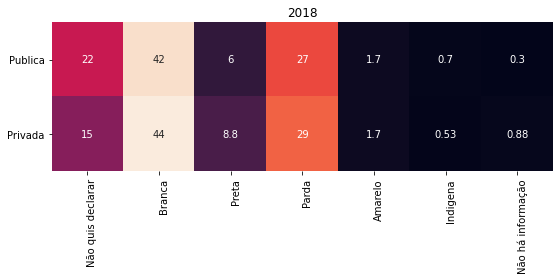

In [333]:
fig = plt.figure(figsize = (15,4))

ax_2018 = fig.add_subplot(1,2,2)

ax_2018 = sns.heatmap(alunos_2018_raca, 
                      annot=True, 
                      cbar=False
                     )

ax_2018.set(xlabel='',
            ylabel='',
            title='2018')

ax_2018.set_xticklabels(labels=['Não quis declarar','Branca','Preta','Parda','Amarelo','Indigena','Não há informação'],
                        rotation='vertical',
                        ha='left')
ax_2018.set_yticklabels(labels=['Publica','Privada'], rotation='horizontal')


fig.tight_layout()

fig.savefig('outputs/figure1_6.png', dpi=400, bbox_inches='tight')

plt.show()

## Figure 1.7 - Gender distribution 2009 x 2017 - by course field

In 2018, women accounted for around 54% of students. Despite a 9 p.p increase in women participation in science, math, and computation courses and a 4 p.p increase in engineering, production, and construction courses, women accounted for less than 40% of students in both fields in 2018. In courses related to Education and Health women represents a vast majority, 88 and 73% respectively.


In [315]:
for i in [2009,2017]:
    globals()['alunos_'+str(i)] = pd.read_csv('data/alunos_'+str(i)+'.csv', usecols=['CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','CO_CURSO'])

In [316]:
# Read courses dataframe

cursos = pd.read_csv('data/cursos.csv', low_memory = False)
    
cursos_2009 = cursos[cursos['NU_ANO']==2009][['CO_CURSO','NO_AREA_GERAL']]   
cursos_2017 = cursos[cursos['NU_ANO']==2017][['CO_CURSO','NO_AREA_GERAL']]  


In [317]:
alunos_2017.loc[alunos_2017['IN_SEXO_ALUNO']==2, ['IN_SEXO_ALUNO']] = 0
print(alunos_2017.groupby('IN_SEXO_ALUNO').count())
print(alunos_2009.groupby('IN_SEXO_ALUNO').count())

               CO_CURSO  CO_COR_RACA_ALUNO
IN_SEXO_ALUNO                             
0               3567841            3567841
1               4159617            4159617
               CO_CURSO  CO_COR_RACA_ALUNO
IN_SEXO_ALUNO                             
0               2097923            2097923
1               2385887            2385887


In [318]:
for i in [2009,2017]:

    globals()['alunos_'+str(i)]['COUNT'] = 1

    globals()['alunos_'+str(i)] = globals()['alunos_'+str(i)].groupby(['IN_SEXO_ALUNO','CO_CURSO'])['COUNT'].sum().to_frame()
    globals()['alunos_'+str(i)].reset_index(level=[0,1], inplace=True)

    globals()['alunos_'+str(i)] = pd.merge(globals()['alunos_'+str(i)], globals()['cursos_'+str(i)], on='CO_CURSO', how='inner')

In [319]:
for i in [2009,2017]:
    totalalunos_Area = globals()['alunos_'+str(i)].groupby(['NO_AREA_GERAL'])['COUNT'].sum().to_frame()
    totalalunos_Area.reset_index(level=[0], inplace=True)
    
    globals()['alunos_'+str(i)+'_sexo'] = globals()['alunos_'+str(i)].groupby(['IN_SEXO_ALUNO','NO_AREA_GERAL'])['COUNT'].sum().to_frame()
    globals()['alunos_'+str(i)+'_sexo'].reset_index(level=[0,1], inplace=True)

    globals()['alunos_'+str(i)+'_sexo'] = pd.merge(globals()['alunos_'+str(i)+'_sexo'],totalalunos_Area, on='NO_AREA_GERAL', how='inner')
    globals()['alunos_'+str(i)+'_sexo']['COUNT_x'] = globals()['alunos_'+str(i)+'_sexo']['COUNT_x']*100/globals()['alunos_'+str(i)+'_sexo']['COUNT_y']


    globals()['alunos_'+str(i)+'_sexo'] = globals()['alunos_'+str(i)+'_sexo'].pivot('NO_AREA_GERAL','IN_SEXO_ALUNO','COUNT_x')

    globals()['alunos_'+str(i)+'_sexo']

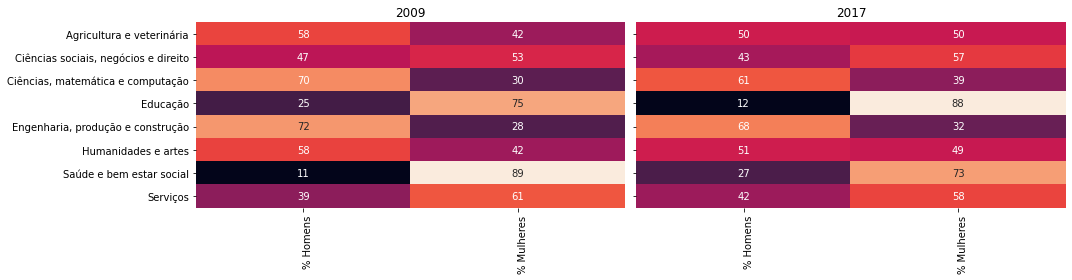

In [334]:
fig = plt.figure(figsize = (15,4))

ax_2017 = fig.add_subplot(1,2,2)

ax_2017 = sns.heatmap(alunos_2017_sexo, 
                      annot=True, 
                      cbar=False
                     )

ax_2017.set(xlabel='',
            ylabel='',
            title='2017')

ax_2017.set_xticklabels(labels=['% Homens','% Mulheres'],
                        rotation='vertical',
                        ha='left')
ax_2017.set_yticklabels(labels='')

ax_2009 = fig.add_subplot(1,2,1)

ax_2009 = sns.heatmap(alunos_2009_sexo, 
                      annot=True, 
                      cbar=False
                     )

ax_2009.set(xlabel='',
            ylabel='',
            title='2009')

ax_2009.set_xticklabels(labels=['% Homens','% Mulheres'],
                        rotation='vertical',
                        ha='left')

fig.tight_layout()

fig.savefig('outputs/figure1_7.png', dpi=400, bbox_inches='tight')

plt.show()